## Student Performance Indicator

### Lifecycle of machine learning project
- Understanding the problem statement
- Data collection
- Data checks to perform
- Exploratory data analysis
- Data pre-processing
- Model training
- Choose the best model

### 1) Problem Statement
- This project understands hoe the student performance (test scores) is affected by other variables such as gender, ethnicity, parental level of education, lunch, and test preparation course.

### 2) Data collection
- Dataset source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

#### 2.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn, and Warnings Library**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Import the CSV data as Pandas DataFrame**

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

**Show Top 5 Records**

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Shape of the dataset**

In [6]:
df.shape

(1000, 8)

The data consists of 8 columns and 1000 rows

#### 2.2 Dataset information
- gender: sex of students -> (male/female)
- race/ethnicity: ethnicity of students -> (group A, B, C, D, E)
- parental level of education: parents' final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch: level of payment for lunch meal -> (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3) Data Checks to perform
- Check missing values
- Check duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
Check various categories present in the different categorical column

#### 3.1 Chek missing values

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

#### 3.2 Check duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

There are no duplicated rows in the dataset

#### 3.3 Check data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values in each column

In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 Check statistics of the dataset

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insights**
- Overall performance (Mean): From the above description of numerical data, all means are very close to each other - between 66 and 68.5. However, average math score is the lowest among the three and rreading and writing are closed to each other indicating students generally perform better in reading and writing compared to math.
- Distribution of scores (Standard deviation): All standard deviations are aso close - between 14.6 and 15.19 indicating the spread (variability) of scores is fairly similar across the three subjects.
- Score ranges (Mean, Max, Quartiles): 
-- For minimum (Math: 0, Reading: 17, Writing: 10), some students performed extremely poorly in all subjects, with math score as low as 0, indicating possible outliers or students left the test blank.
-- All subjects have a maximum of 100, indicating some students scored perfectly in all three subjects
- Quartiles:
-- The bottom 25% of students are scoring just above 50 in all subjects (Math: 57, Reading: 59, Writing: 57.75)
-- Half of the students score below 66 in math, below 70 in reading, and below 69 in writing
-- The top 25% of students have scores above 77-79 across all subjects, showing high performers are consistent across subjects.
- Score symmetry (Comparing mean and median): In all subjects, the mean and median (50th percentile) are very close (e.g 66.09 vs 66 for math), indicatinf that the distributions are likely symmetric with no significant skewness

#### 3.6 Exploring data

In [15]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [17]:
cols_to_check = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
                   'test preparation course']

for col in cols_to_check:
    print(f"Categories in {col}: {df[col].unique()}")

Categories in gender: ['female' 'male']
Categories in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch: ['standard' 'free/reduced']
Categories in test preparation course: ['none' 'completed']


In [24]:
# Define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print(f"We have {len(numerical_features)} numerical features: ", numerical_features)
print(f"We have {len(categorical_features)} categorical features: ", categorical_features)

We have 3 numerical features:  ['math score', 'reading score', 'writing score']
We have 5 categorical features:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### 3.7 Adding columns for "Total Score" and "Average"

In [27]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = (df['total score'] / 3).round(1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.7
1,female,group C,some college,standard,completed,69,90,88,247,82.3
2,female,group B,master's degree,standard,none,90,95,93,278,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.3
4,male,group C,some college,standard,none,76,78,75,229,76.3


In [34]:
# Count students with full marks
for feature in numerical_features:
    print(f"Number of students with full marks in {feature}: {(df[feature] == 100).sum()}")

Number of students with full marks in math score: 7
Number of students with full marks in reading score: 17
Number of students with full marks in writing score: 14


In [35]:
# Count students with less than 20 marks
for feature in numerical_features:
    print(f"Number of students with less than 20 marks in {feature}: {(df[feature] <=20).sum()}")

Number of students with less than 20 marks in math score: 4
Number of students with less than 20 marks in reading score: 1
Number of students with less than 20 marks in writing score: 3


**Insights**
- From above values, we see that students perform the worst in Maths
- Best performance is in reading

### 4 Exploring Data (Visualization)

**4.1 Visualize average score distribution to make some conclusion**
- Histogram
- Kernel Distribution Function (KDE)

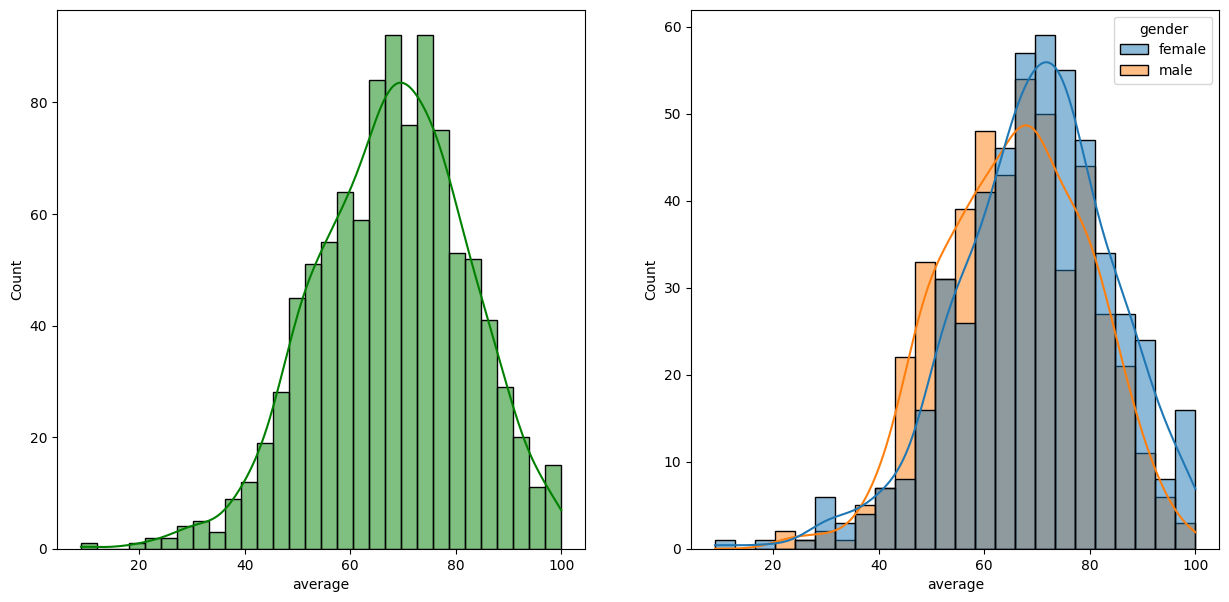

In [44]:
# Average and gender differences on the average
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

**Insight**
- Female students tend to perform better than male students

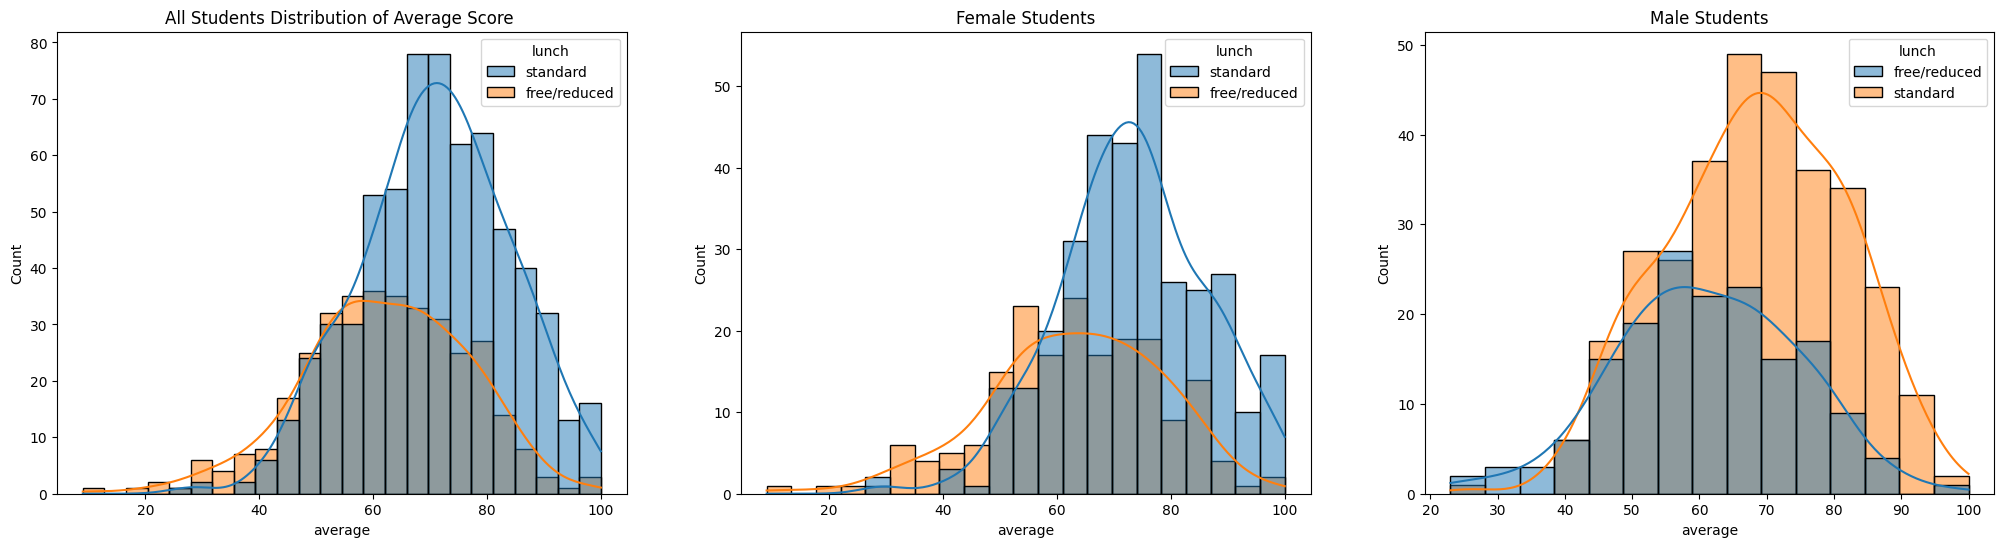

In [52]:
# Effect of lunch type of average for overall and for each genders
fig, axs = plt.subplots(1,3, figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
axs[0].set_title('All Students Distribution of Average Score ')

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch')
axs[1].set_title('Female Students')

plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch')
axs[2].set_title('Male Students')

plt.show()

**Insights**
- Standard lunch helps students perform well in exams
- Standard lunch helps students perform well be it a male or female

In [53]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.7
1,female,group C,some college,standard,completed,69,90,88,247,82.3


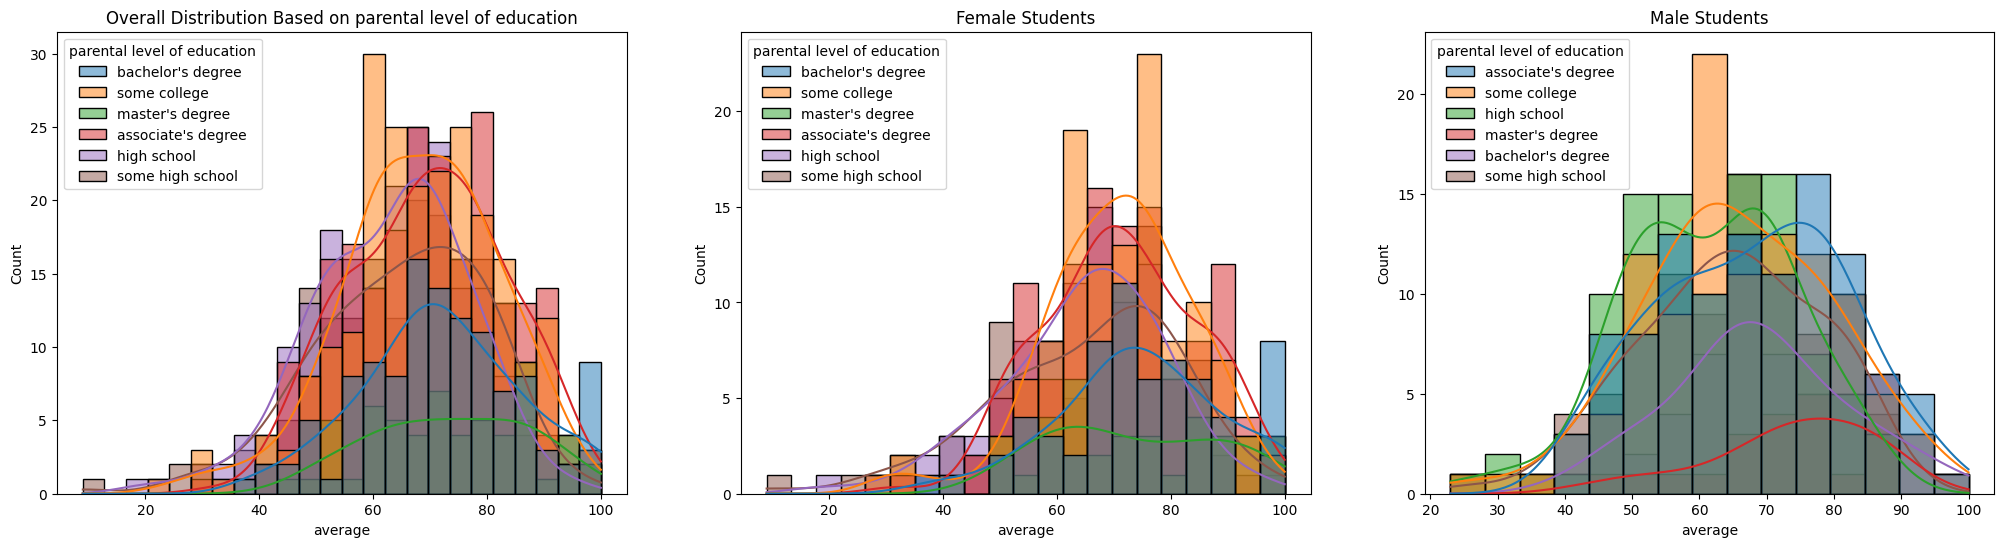

In [54]:
# Impact of parental level of education on average marks
fig, axs = plt.subplots(1,3, figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
axs[0].set_title('Overall Distribution Based on parental level of education')

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='average',
             kde=True, hue='parental level of education')
axs[1].set_title('Female Students')

plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average',
             kde=True, hue='parental level of education')
axs[2].set_title('Male Students')

plt.show()

**Insights**
- In general, parents' education do not help student perform well in exam
- 3rd plot shows that parents whose education is of associate's degree or master's degree their male chils tend to perform well in exam
- In the 2rd plot we can see there is no effect of parent's education on female students.

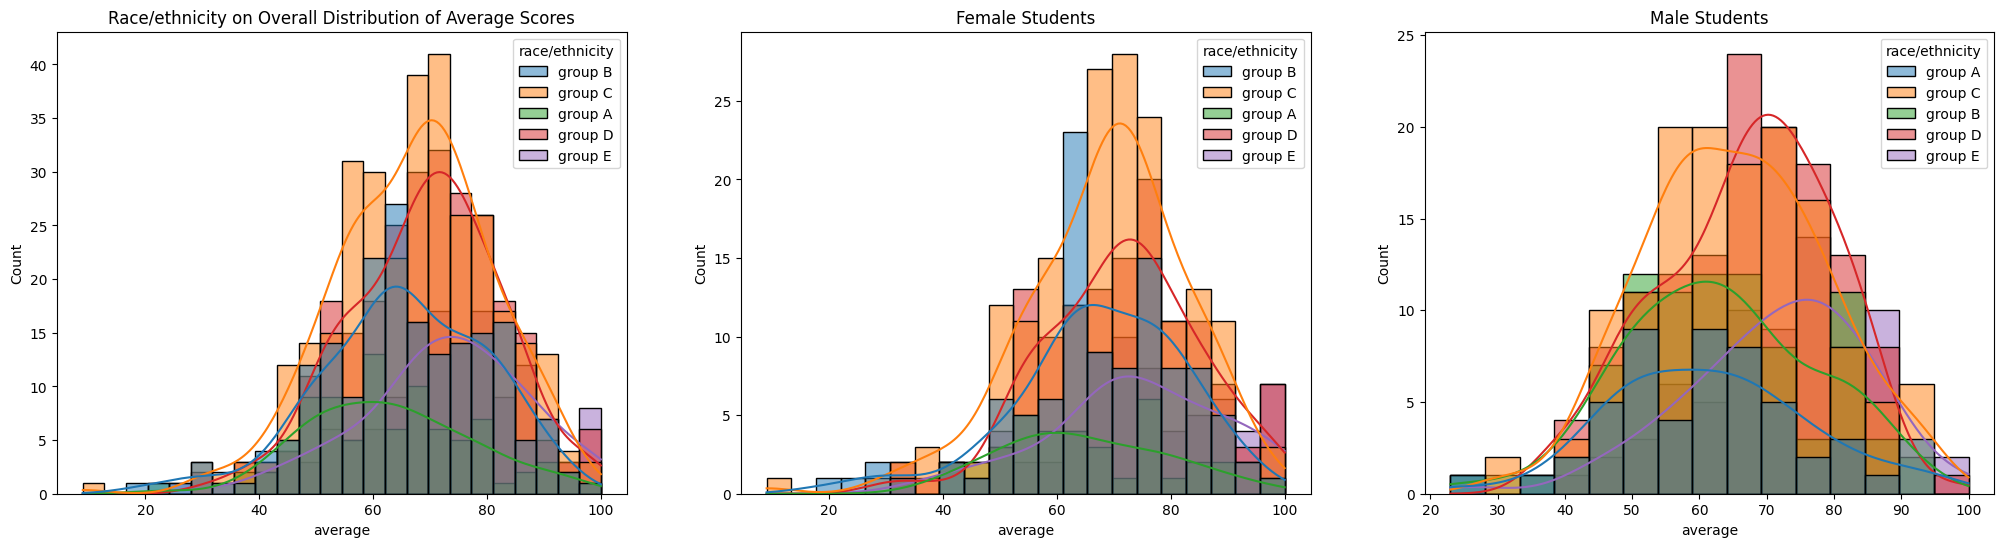

In [55]:
# Impact of race/ethnicity on average
fig, axs = plt.subplots(1,3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
axs[0].set_title('Race/ethnicity on Overall Distribution of Average Scores')

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'],
             x='average', kde=True, hue='race/ethnicity')
axs[1].set_title('Female Students')

plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'],
             x='average', kde=True, hue='race/ethnicity')
axs[2].set_title('Male Students')

plt.show()

**Insights**
- Students from group A and B tend to perform poorly in exams.
- Students from group A and B tend to perform poorly in exams irrespective of thier gender.

#### 4.2 Maximum score of students in all the three subjects
**Violinplot**